In [1]:
import tensorflow as tf

In [2]:
import os

In [26]:
dataset_path = r'C:\Users\Hp\Downloads\VW_AI\dataset'

# Lists to store image paths and corresponding labels
image_paths = []
labels = []

# Walk through the dataset directory
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        # Get the full path of the image
        image_path = os.path.join(root, file)
        
        # Extract label information from the directory structure
        relative_path = os.path.relpath(image_path, dataset_path)
        label = os.path.dirname(relative_path)
        
        # Append the image path and label to the lists
        image_paths.append(image_path)
        labels.append(label)

# Print the first few image paths and labels
for img_path, label in zip(image_paths[:5], labels[:5]):
    print(f"Image Path: {img_path}, Label: {label}")

Image Path: C:\Users\Hp\Downloads\VW_AI\dataset\train\female\bottoms\bottom1.jpg, Label: train\female\bottoms
Image Path: C:\Users\Hp\Downloads\VW_AI\dataset\train\female\bottoms\bottom2.jpg, Label: train\female\bottoms
Image Path: C:\Users\Hp\Downloads\VW_AI\dataset\train\female\tops\top1.jpg, Label: train\female\tops
Image Path: C:\Users\Hp\Downloads\VW_AI\dataset\train\female\tops\top2.jpg, Label: train\female\tops
Image Path: C:\Users\Hp\Downloads\VW_AI\dataset\train\male\bottoms\bottom1.jpg, Label: train\male\bottoms


In [27]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [28]:
TRAINING_DIR = r'C:\Users\Hp\Downloads\VW_AI\dataset\train'
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

VALIDATION_DIR = r'C:\Users\Hp\Downloads\VW_AI\dataset\validation'
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
from keras.utils import to_categorical


train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 8 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [33]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [36]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [37]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 3s 47ms/step - loss: 0.6991 - accuracy: 0.5000 - val_loss: 1.2344 - val_accuracy: 0.5000


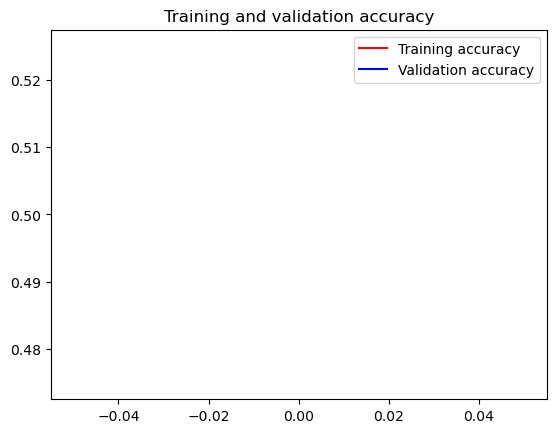

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()